# Algorithms practice

## Epsilon-Greedy (based on [tutorial from GeeksforGeeks](https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/))

Epsilon-greedy is an algorithmic approach to maximizing rewards amid the explore-exploit tradeoff. You can either explore or exploit, not do both. An epsilon-greedy algorithm chooses to exploit most of the time, but with a small chance of exploring.

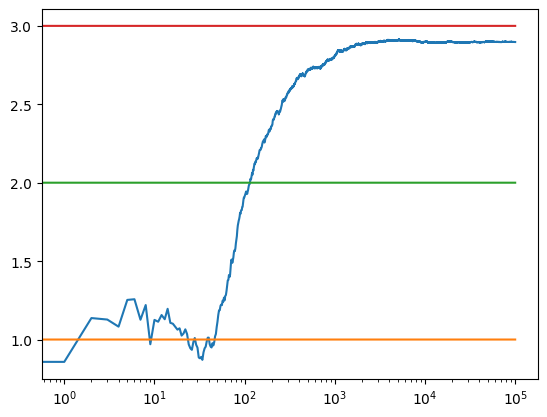

Realized mean value of action 0
1.0102395640287114
Realized mean value of action 1
1.9744414468336056
Realized mean value of action 2
3.000138912202525


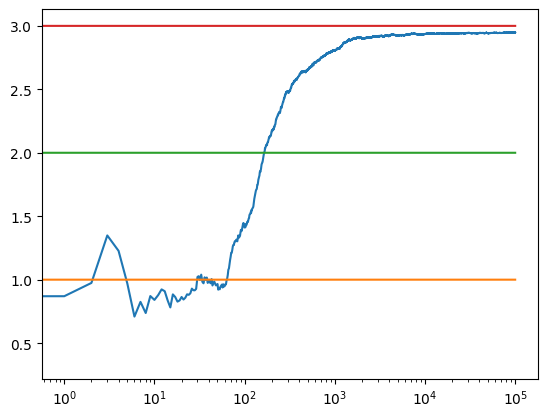

Realized mean value of action 0
1.0129850028976108
Realized mean value of action 1
2.03931739653008
Realized mean value of action 2
2.998019137788851


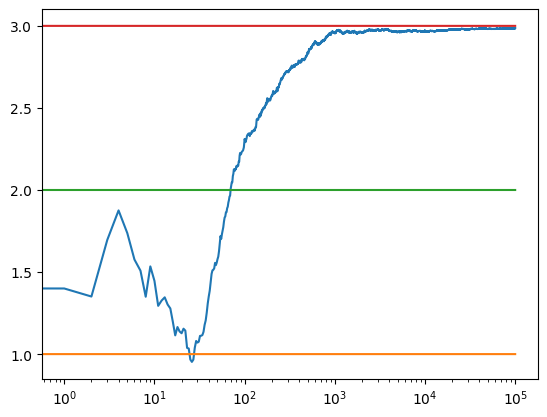

Realized mean value of action 0
0.9514924428714954
Realized mean value of action 1
2.028386610100723
Realized mean value of action 2
2.9974614839963016
Realized mean action value with an epsilon of 10%: 
2.8933698087766655
Realized mean action value with an epsilon of 5%: 
2.9367349457167626
Realized mean action value with an epsilon of 1%: 
2.9770700687885108


In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

# Define Action class 
class Actions: 
  def __init__(self, m): 
    # Expected value of taking the action (i.e., multiplier)
    self.m = m
    # Past mean value of having taken the action
    self.mean = 0
    # Action counter
    self.N = 0

  # Randomly choose a number from the standard normal distribution (mean 0, sd 1)
  # and use it to add noise to the expected value of taking the action
  def choose(self):
    return np.random.randn() + self.m 

  # Update the action counter and action-value estimate 
  def update(self, x): 
    self.N += 1
    # Use the incremental update formula for the sample mean
    # (E.g., if the current action is the tenth, we add the 9/10 the
    # previous mean to 1/10 the new action value to get the new mean)
    self.mean = (1 - 1.0 / self.N) * self.mean + (1.0 / self.N) * x 


def run_experiment(m1, m2, m3, eps, N): 
	# Intialize an array of three Action class instances (each representing a 
  # different action we could take, with a different expected value)
  actions = [Actions(m1), Actions(m2), Actions(m3)] 

  # Initialize empty array of length N
  data = np.empty(N)
    
  for i in range(N):
    # Choose a random probability 'p' from the uniform distribution from 0 to 1
    p = np.random.random()

    # If p is lower than whatever probability threshold ("espilon") we have set,
    # then "explore" by taking a random action
    if p < eps:
      # Choose a random integer from range(0,3): i.e., 0, 1, or 2
      j = np.random.choice(3)

    # Otherwise, choose the action with the highest mean realized action value
    else:
      j = np.argmax([a.mean for a in actions])

    # "Take" the selected action by generating a realized value, calculated as
    # expected value + random noise factor
    x = actions[j].choose()

    # Update the mean realized value for the action
    actions[j].update(x)

    # Add the expected value of the selected action to an array representing
    # a time series of the realized values of the actions we took
    data[i] = x 
  
  # For each data point in the time series array, calculate the cumulative
  # mean of our realized action values up to that point
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 

  # plot our realized cumulative mean against horizontal lines showing the
  # initial expected values of the three actions; use log scale
  plt.plot(cumulative_average) 
  plt.plot(np.ones(N)*m1) 
  plt.plot(np.ones(N)*m2) 
  plt.plot(np.ones(N)*m3) 
  plt.xscale('log') 
  plt.show() 

  # Print mean realized value of each action
  for i, a in enumerate(actions):
    print(f"Realized mean value of action {str(i)}")
    print(a.mean)

  # Return the mean realized value of the actions we took
  return cumulative_average

# Run the experiment with an epsilon of 10% and 100,000 turns
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

# Run the experiment with an epsilon of 5% and 100,000 turns
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

# Run the experiment with an epsilon of 1% and 100,000 turns
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

print("Realized mean action value with an epsilon of 10%: ")
print(np.mean(c_1))
print("Realized mean action value with an epsilon of 5%: ")
print(np.mean(c_05))
print("Realized mean action value with an epsilon of 1%: ")
print(np.mean(c_01))

Across multiple trials, it generally seems to be the 1% epsilon threshold that performs best in this simulation. As a highly curious person who spends *most* of his time exploring (a dispositionally high-epsilon person), I find this a bit discouraging, but I also think it has a lot of explanatory power. There's a reason I live in abject poverty.

Of course, the optimal value of epsilon in any real-world scenario depends a great deal on the parameters: the expected values of the different options, the amount of noise, the number of remaining turns. Some advanced strategies also reduce the value of epsilon over time, to reflect that we now have better estimates of expected value and lower uncertainty, so we don't need to experiment as much.

Furthermore, the above simulation makes a couple assumptions that don't apply in most real-world situations: that we know the full set of available options (i.e., that exploration won't uncover new ones) and that expected value is stationary (e.g., that external factors like competition won't change the expected value of an action, and that). It could be argued, for instance, that in decision-making about careers or investing, expected value is highly non-stationary (and becoming moreso every day).

## Calculating large Fibonacci numbers

Say we want to calculate the millionth Fibonacci number. The classical algorithm for calculating the nth Fibonacci number, taught in most introductory computer science courses, is as follows:

In [54]:
def fib(n):
    """Calculates the nth Fibonacci number"""
    a, b = 0, 1
    while n > 0:
        a, b = b, a + b
        n -= 1

    return a

Note that this algorithm treats 0 as the 0th Fibonacci number and will only handle positive values for n. (Mathematicians sometimes count 0 as the first Fibonacci number. This is known as the combinatorial definition. But counting from 0 is more traditional and works better if you want to accommodate negative values of n.)

Since we know that `fib(n + 2) = fib(n) + fib(n + 1)`, we can solve for `fib(n)` to get `fib(n) = fib(n + 2) - fib(n + 1)`, and we can use this solution to extend our classical Fibonacci algorithm to accommodate negative values of n:

In [55]:
def fib(n):
    """Calculates the nth Fibonacci number"""
    a, b = 0, 1
    while n > 0:
        a, b = b, a + b
        n -= 1
    while n < 0:
        a, b = b - a, a
        n += 1
    return a

for n in range(-5,6):
    print(fib(n), end=" ")

5 -3 2 -1 1 0 1 1 2 3 5 

Note that the Fibonacci numbers for negative values of n have the same absolute values as the Fibonacci numbers for corresponding positive values of n. However, they are negative when n is even, but positive when n is odd. Thus, `fib(-1) == 1`, but `fib(-2) == -1`. We could, of course, use this heuristic in our algorithm, but there's no efficiency gain from doing so.

This classical algorithm for calculating the nth Fibonacci number takes approximately O(n^2) time, or quadratic time, because of the increasing computational burden of large-number arithmetic for high values of n. The number of digits in the nth Fibonacci number is linearly related to n, as we can confirm by plotting n against the number of digits, as shown below.  The algorithm requires O(n) iterations to reach the nth Fibonacci number, and each iteration involves an addition operation with numbers of size O(n). Assuming a standard arithmetic algorithm where the time complexity of adding two numbers is proportional to the number of digits, each addition operation takes O(n) time. Therefore, the total time complexity of the algorithm is O(n^2), resulting from O(n) iterations, each with an O(n) time complexity for the addition operation. (In practice, it may be closer to O(n*log(n)) due to the efficiency of Python's underlying algorithms for large-number arithmetic.)

[0.20849085 0.18121213]


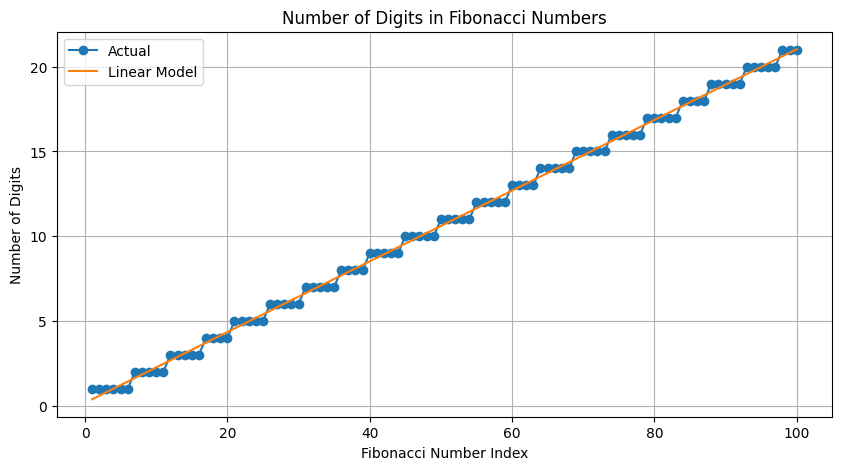

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Calculate the first 100 Fibonacci numbers
fibonacci_numbers = [fib(i) for i in range(1, 101)]

# Get the number of digits in each Fibonacci number
num_digits = [len(str(num)) for num in fibonacci_numbers]

# Define the linear model function
def linear_model(x, a, b):
    return a * x + b

# Fit the linear model
x_data = np.arange(1, 101)
popt_linear, _ = curve_fit(linear_model, x_data, num_digits)

# Generate points for the fitted model
x_fit = np.linspace(1, 100, 100)
y_fit_linear = linear_model(x_fit, *popt_linear)

# Plotting the number of digits and fitted model
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), num_digits, marker='o', label='Actual')
plt.plot(x_fit, y_fit_linear, label='Linear Model')
plt.title('Number of Digits in Fibonacci Numbers')
plt.xlabel('Fibonacci Number Index')
plt.ylabel('Number of Digits')
plt.legend()
plt.grid(True)
plt.show()

Let's check our intuitions about time complexity:

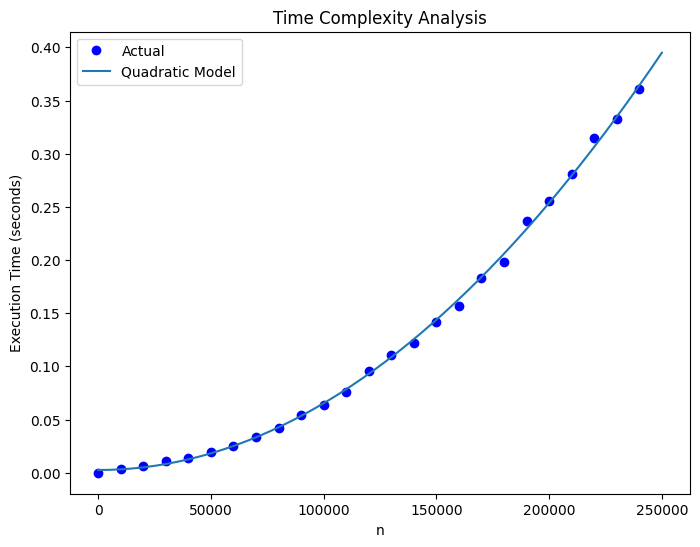

In [76]:
import timeit
from scipy.optimize import curve_fit

def test_time_complexity(fib_func, n_values, num_runs=3):
    """
    Tests the time complexity of the Fibonacci function.
    
    Args:
        fib_func (function): The Fibonacci function to test.
        n_values (list): A list of n values to test.
        num_runs (int): The number of times to run each test case (default=3).
    
    Returns:
        A list of tuples containing the n value and the average execution time.
    """
    results = []
    for n in n_values:
        stmt = f"{fib_func.__name__}({n})"
        setup = f"from __main__ import {fib_func.__name__}"
        execution_time = timeit.timeit(stmt, setup, number=num_runs)
        avg_time = execution_time / num_runs
        results.append(avg_time)
    return results

# Test the time complexity
n_values = list(range(0, 250000, 10000))
exec_times = test_time_complexity(fib, n_values, 10)

# Define the linear model function
def quadratic_model(x, a, b):
    return a * x**2 + b

# Fit the linear model
popt_quadratic, _ = curve_fit(quadratic_model, n_values, exec_times)

# Generate points for the fitted models
x_fit = np.linspace(1, 250000)
y_fit_quadratic = quadratic_model(x_fit, *popt_quadratic)

# Plot the results and fitted models
plt.figure(figsize=(8, 6))
plt.plot(n_values, exec_times, 'bo', label='Actual')
plt.plot(x_fit, y_fit_quadratic, label='Quadratic Model')
plt.xlabel('n')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Time Complexity Analysis')
plt.show()

As expected, our analysis shows that this algorithm takes quadratic time.

Fortunately, Fibonacci numbers have mathematical properties we can take advantage of to complete the calculation faster. Let's look at two such approaches.

### 1. Calculating Fibonacci numbers using Binet's formula

For our first solution, we can take advantage of the rule that `fib(n)` for any positive value of n is the closest integer to `(Φ**n)/sqrt(5)`, where `Φ = (1+sqrt(5))/2` (an irrational constant known as the "Golden Ratio"). This rule is a simplified version of "Binet's Formula" (see [this proof](https://www.cut-the-knot.org/proofs/BinetFormula.shtml) of the full formula).

Note that by default, Python's double-precision `float` type is accurate only to about 15 decimal digits. This is inadequate for precision with numbers as large as we want to calculate, so we have to use Python's `Decimal` type. To determine the necessary precision, we can use an approximation of the formula for calculating the number of digits from the linear model we trained above.

Since the version of Binet's Formula we're using only applies to positive numbers, we can also now take advantage of our observation, above, that Fibonacci numbers for negative values of n are negative when n is even, but positive when n is odd. (There's a more complex version of Binet's formula we could use, but the even-odd heuristic saves us a bit of computation time vs. that formula.)

In [77]:
from decimal import Decimal, getcontext
from math import ceil

def fib(n):
    """Calculates the nth Fibonacci number"""
    if n < 0 and n % 2 == 0:
        sign, n = -1, abs(n)
    else:
        sign, n = 1, abs(n)
    
    # Not shown: I trained a linear model to determine necessary precision
    getcontext().prec = ceil(0.21*n + 5)
    
    # Use Binet's formula to calculate nth fib
    sqrt_5 = Decimal(5).sqrt()
    dec_n = Decimal(n)
    phi = (Decimal(1) + sqrt_5) / Decimal(2)
    fib_n = (phi**dec_n) / sqrt_5

    return sign*round(fib_n)

Presumably we're now completing the calculation in approximately O(n), or linear, time complexity (since the number of digits required for the operation scales linearly with n). Let's check that intuition:

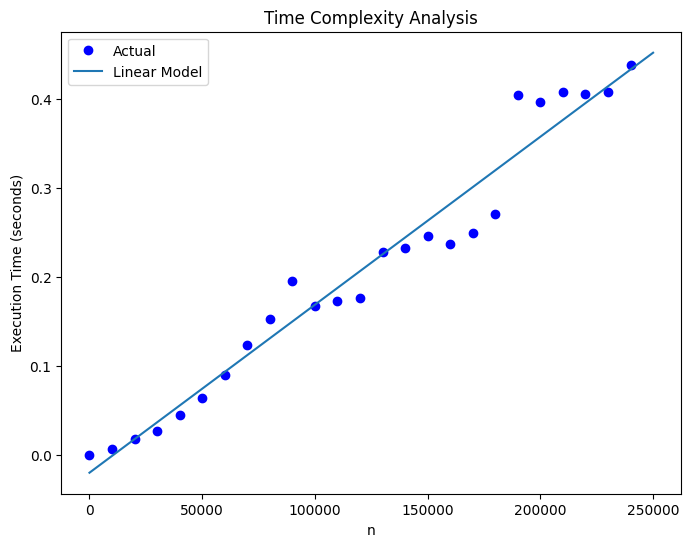

In [78]:
# Test the time complexity
n_values = list(range(0, 250000, 10000))
exec_times = test_time_complexity(fib, n_values, 10)

# Define the linear model function
def linear_model(x, a, b):
    return a * x + b

# Fit the linear model
popt_linear, _ = curve_fit(linear_model, n_values, exec_times)

# Generate points for the fitted models
x_fit = np.linspace(1, 250000)
y_fit_linear = linear_model(x_fit, *popt_linear)

# Plot the results and fitted models
plt.figure(figsize=(8, 6))
plt.plot(n_values, exec_times, 'bo', label='Actual')
plt.plot(x_fit, y_fit_linear, label='Linear Model')
plt.xlabel('n')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Time Complexity Analysis')
plt.show()

Sure enough, it looks like this is a linear time algorithm and will outperform the classical algorithm for values of n greater than about 250,000.

### 2. Calculating Fibonacci numbers using matrix exponentiation

A second approach performs even better, allowing us to calculate the nth Fibonacci number in O(log(n)) time complexity (and with far fewer lines of code). This approach is based on the "matrix exponentiation" formula (see [this proof](https://math.stackexchange.com/a/784723)) for calculating Fibonacci numbers—that is, the observation that, for positive values of n:

```
[[1, 1], [1, 0]]**n = [[f(n+1), f(n)], [f(n), f(n-1)]]
```

In other words, when you raise a 2x2 matrix with the values `1, 1; 1, 0` to the nth power, the nth Fibonacci number will be in the upper right position in the resulting matrix. The "binary exponentiation algorithm" for matrix multiplication takes O(log(n)) time, making this operation very efficient.

For negative values of n, we replace 1 with -1 in the upper left position of the transformation matrix and raise the matrix to the absolute-value-of-n power.

In [80]:
from numpy import matrix

def fib(n):
    return (
            matrix(
                '1 1; 1 0' if n >= 0 else '-1 1; 1 0',
            ) ** abs(n) # Raise matrix to absolute value of n power
        )[0, 1] # Return the number in the 0th row, 1st column

Let's confirm that this is taking O(log(n)) time complexity:

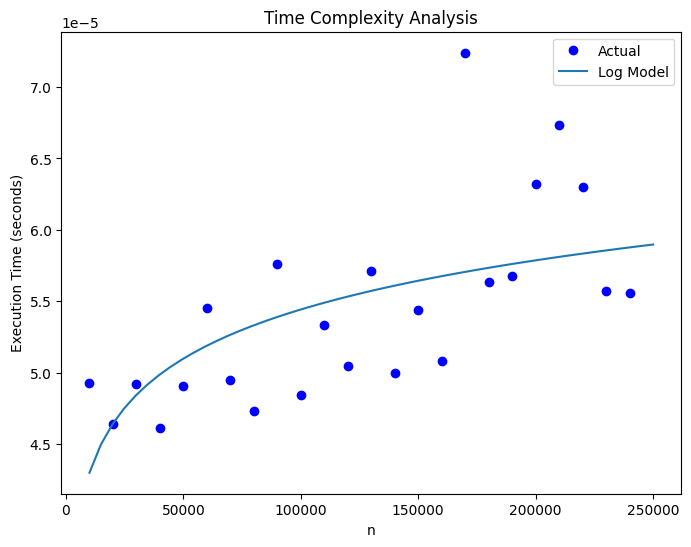

In [91]:
# Test the time complexity
n_values = list(range(10000, 250000, 10000))
exec_times = test_time_complexity(fib, n_values, 10000)

# Define the linear model function
def log_model(x, a, b):
    return a * np.log(x) + b

# Fit the linear model
popt_log, _ = curve_fit(log_model, n_values, exec_times)

# Generate points for the fitted models
x_fit = np.linspace(10000, 250000)
y_fit_log = log_model(x_fit, *popt_log)

# Plot the results and fitted models
plt.figure(figsize=(8, 6))
plt.plot(n_values, exec_times, 'bo', label='Actual')
plt.plot(x_fit, y_fit_log, label='Log Model')
plt.xlabel('n')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Time Complexity Analysis')
plt.show()

We more or less confirm our expectation, although this operation is *so* blazingly fast that our time measurement is mostly noise, and we have to repeat the operation ten thousand times for each value of n to get a meaningful result!

(To be honest, I'm completely blown away by the speed of this calculation. It's one thing to read in a book that this is the fastest approach, and another thing to actually see the performance on a benchmark. Clearly I need to master matrix math, because it's an incredible tool.)